## More NumPy and Matplotlib (By Example)

### DATA 601: Fall 2019

**Usman Alim ([ualim@ucalgary.ca](mailto:ualim@ucalgary.ca))** 

Further Reading:

* **Python for Data Analysis** (second edition), by _Wes McKinney_ (Chapter 4). ([Library link](https://ucalgary-primo.hosted.exlibrisgroup.com/primo-explore/fulldisplay?docid=01UCALG_ALMA51642853910004336&context=L&vid=UCALGARY&search_scope=EVERYTHING&tab=everything&lang=en_US) for book)
* **[NumPy User Guide](https://numpy.org/devdocs/user/index.html)**
* **[Matplotlib User's Guide](https://matplotlib.org/users/index.html)**


## Topics

- Slicing
- Fancy indexing
- Vectorized computation
- Computing simple statistics on arrays (_histograms_)  
- Basic linear algebra (_scatter plots_ and _density plots_ )

In [1]:
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import matplotlib.pyplot as plt
print(np.__version__)
print(mpl.__version__)

1.16.2
3.0.3


In [2]:
# Familiar list slicing extends to multiple dimensions
# Recall that slices are views.
import numpy as np

a = np.random.rand(3,3)
print(a)
av = a[0:2,0:2]
print(av)
av[:] = 0

print(av)
print(a)

[[0.87552409 0.09309677 0.08599035]
 [0.27935534 0.18428502 0.24957605]
 [0.0359768  0.30812689 0.81187483]]
[[0.87552409 0.09309677]
 [0.27935534 0.18428502]]
[[0. 0.]
 [0. 0.]]
[[0.         0.         0.08599035]
 [0.         0.         0.24957605]
 [0.0359768  0.30812689 0.81187483]]


In [3]:
# We can extract a sub matrix out of a matrix
A = np.ones((5,5))
A[0::2, 0::2] = 0
print(A)
print("\n")

# access a particular row
print(A[0,:])
print("\n")

# or a particular column
print(A[:,3])
A[:,3] = -1
print(A)

[[0. 1. 0. 1. 0.]
 [1. 1. 1. 1. 1.]
 [0. 1. 0. 1. 0.]
 [1. 1. 1. 1. 1.]
 [0. 1. 0. 1. 0.]]


[0. 1. 0. 1. 0.]


[1. 1. 1. 1. 1.]
[[ 0.  1.  0. -1.  0.]
 [ 1.  1.  1. -1.  1.]
 [ 0.  1.  0. -1.  0.]
 [ 1.  1.  1. -1.  1.]
 [ 0.  1.  0. -1.  0.]]


In [4]:
# We can pass in a list of indices. This is known as fancy indexing.
# It works in any dimension

A = np.reshape(np.arange(0,24),(4,6))
print(A)
print(A[[1,3],[3,5]])

print("\n")

# We can also assign via fancy indexing

A[[1,3],[3,5]] = -1
print(A)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
[ 9 23]


[[ 0  1  2  3  4  5]
 [ 6  7  8 -1 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 -1]]


# Vectorizaton

- Vectorization is the process of operating on entire arrays rather than individual elements. 
- Processors have vectorized instructions which speed up these operations.
- Vectorized functions in NumPy execute much faster as they take advantage of acceleration available at the hardware level.
- Vectorization mantra: _Forget loops, think parallel_


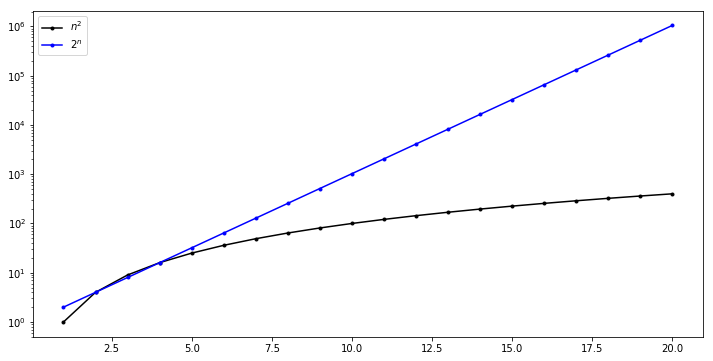

In [5]:
# Example: Math functions on entire arrays
# Note that numpy also has matplotlib integration, i.e. 
# we can pass numpy arrays to matplotlib.


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
n = np.arange(1,21)
plt.semilogy( n, n**2 ,'k.-', label='$n^2$')
plt.semilogy( n, np.power(2,n) ,'b.-', label='$2^n$')
plt.legend();
fig.set_size_inches(12,6)
plt.show()


Mean = -0.000202675014811462
STD = 1.0038233479772734


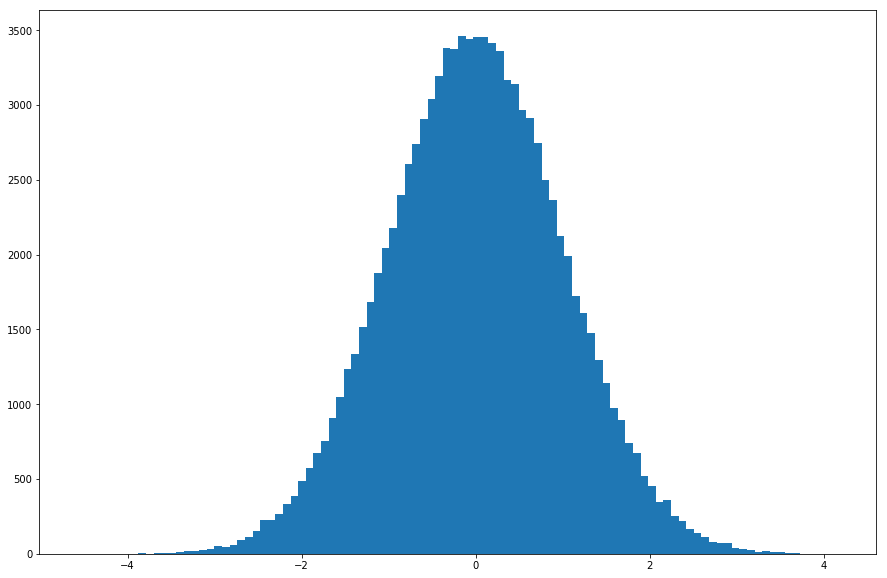

In [6]:
# Stats on a 1D array

X = np.random.randn(100000)
print("Mean = " + str(X.mean()))
print("STD = " + str(X.std()))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.hist(X, bins=100)
fig.set_size_inches(15,10)
plt.show()

In [7]:
# Stats on a 2D array
X = np.reshape(np.arange(100),[5,20])
print(X)

# Can print mean for the entire 2D array
print(X.mean())
print("\n")

# or for a particular axis
mean0 = X.mean(axis=0)
mean1 = X.mean(axis=1)
print(mean0)
print(mean1)




[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]]
49.5


[40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57.
 58. 59.]
[ 9.5 29.5 49.5 69.5 89.5]


## Linear Algebra Example: Transforming Bivariate Data

- Generate points in 2D drawn from a bivariate normal distribution
- Plot a scatter plot of the data
- Plot a 2D histogram of the data
- Transform points by applying a 2D transformation matrix
- Plot a scatter plot of the transformed points



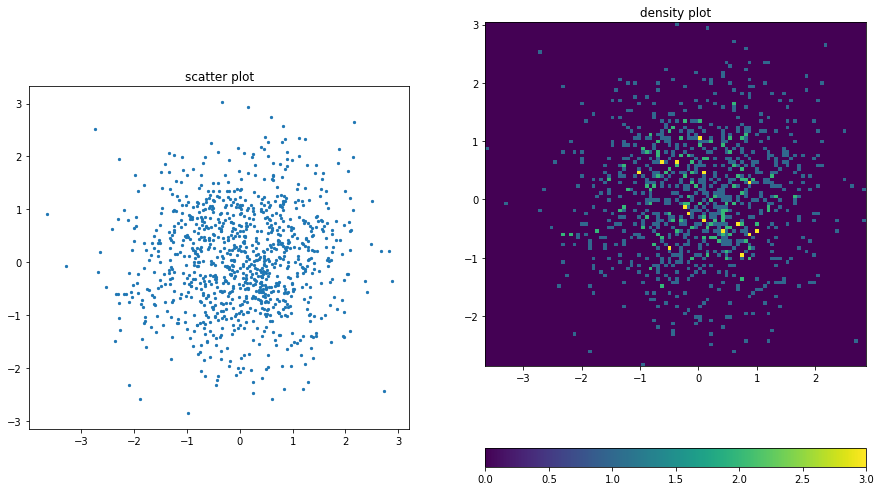

In [8]:


N = 1000
points = np.random.randn(2,N)

# We can do a scatter plot and 2D histogram (density plot)
# through matplotlib
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
plt.scatter(points[0,:], points[1,:], s=5)
ax1.set_aspect('equal', 'box')
ax1.set_title('scatter plot')

ax2 = fig.add_subplot(1,2,2)
plt.hist2d(points[0,:], points[1,:], bins=100)
ax2.set_aspect('equal', 'box')
ax2.set_title('density plot')
plt.colorbar(orientation='horizontal')

fig.set_size_inches(15,10)
plt.show()


[[1 2]
 [2 1]]


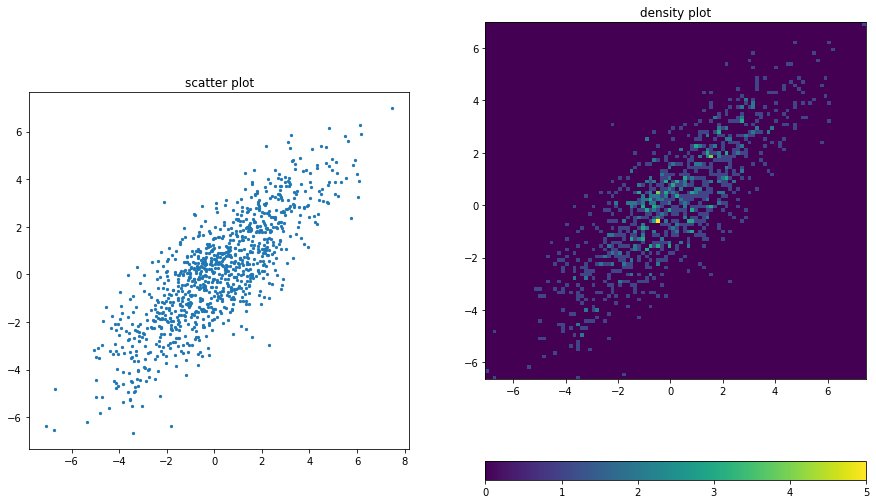

In [9]:
# Now let us transform the data and plot again
# We will do this by doing a matrix-matrix multiplication

M = np.array([[1,2],[2,1]])
print(M)
tpoints = M.dot(points)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
plt.scatter(tpoints[0,:], tpoints[1,:], s=5)
ax1.set_aspect('equal', 'box')
ax1.set_title('scatter plot')

ax2 = fig.add_subplot(1,2,2)
plt.hist2d(tpoints[0,:], tpoints[1,:], bins=100)
ax2.set_aspect('equal', 'box')
plt.colorbar(orientation='horizontal')
ax2.set_title('density plot')

fig.set_size_inches(15,10)
plt.show()

## Exercise: Working with Text Data

- Use the function below to read the file 'responses.txt' into a Python list.
- Convert the list to a NumPy array and clean it up.
  - get rid of empty entries
  - covert everything to lower case
  - get rid of leading and trailing whitespace characters
- Use appropriate NumPy functions to perform a tally of all the unique responses.
- Use matplotlib to visualize the result.


In [10]:
def freadToList(fname, sep='\n'):
    file = open(fname, 'rt', encoding='utf8')
    text = file.read()
    file.close()
    # split based on provided separator
    return text.split(sep=sep)